In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 최소 제곱법
# list를 연산을 위해 numpy array 형태로 변환

x = np.array([2, 4, 6, 8])
y = np.array([81 ,93, 91, 97])

mx = np.mean(x)
my = np.mean(y)

print("x의 평균값 : ", mx)
print("y의 평균값 : ", my)

divisor = sum([(i-mx)**2 for i in x])
# divisor = np.sum((x - mx)**2)

def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] -mx)*(y[i] -my)
    return d

dividend = top(x, mx, y, my)

print("분모 : ", divisor)
print("분자: ", dividend)

a = dividend / divisor
b = my -(mx*a)

print("기울기 a = ", a)
print("y 절편 b = ", b)

x의 평균값 :  5.0
y의 평균값 :  90.5
분모 :  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


In [31]:
# 평균 제곱 오차
fake_a = 3
fake_b = 76

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# y = ax + b에 가상의 a값과 b의 값을 대입한 결과를 출력하는 함수
def predict(x):
    return fake_a *x + fake_b

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" %(x[i], y[i], predict(x[i])))
#predict_result[3] =99.9
print(predict_result)
print(type(predict_result))
n = len(x)
def mse(y, y_pred):
    # numpy의 브로드케스팅에 의해서 numpy배열과 리스트의 연산이 가능해짐 
    return (1/n) * sum((y- y_pred)**2)

print("평균 제곱 오차: " + str(mse(y, predict_result)))

공부시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부시간 = 8, 실제 점수 = 97, 예측 점수 = 100
[82, 88, 94, 100]
<class 'list'>
평균 제곱 오차: 11.0


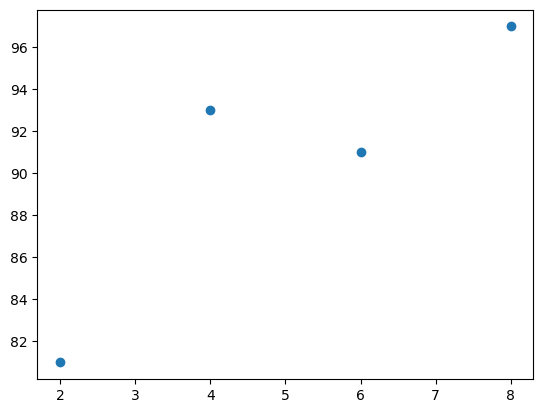

[0 0 0 0]
epoch=0, 기울기=27.8400, 절편=5.4300
[ 64.47330277  78.7148101   92.95631743 107.19782477]
epoch=100, 기울기=7.0739, 절편=50.5117
[ 76.40424003  84.63152613  92.85881222 101.08609831]
epoch=200, 기울기=4.0960, 절편=68.2822
[80.89284315 86.85748461 92.82212607 98.78676753]
epoch=300, 기울기=2.9757, 절편=74.9678
[82.58152547 87.69492482 92.80832417 97.92172352]
epoch=400, 기울기=2.5542, 절편=77.4830
[83.21683404 88.00998286 92.80313168 97.59628051]
epoch=500, 기울기=2.3956, 절편=78.4293
[83.455847   88.1285126  92.80117819 97.47384378]
epoch=600, 기울기=2.3360, 절편=78.7853
[83.5457674  88.17310533 92.80044325 97.42778118]
epoch=700, 기울기=2.3135, 절편=78.9192
[83.57959685 88.18988181 92.80016676 97.41045171]
epoch=800, 기울기=2.3051, 절편=78.9696
[83.59232402 88.19619338 92.80006274 97.4039321 ]
epoch=900, 기울기=2.3019, 절편=78.9886
[83.59711218 88.19856789 92.8000236  97.40147932]
epoch=1000, 기울기=2.3007, 절편=78.9957
[83.59891356 88.19946122 92.80000888 97.40055654]
epoch=1100, 기울기=2.3003, 절편=78.9984
[83.59959126 88.1997973 

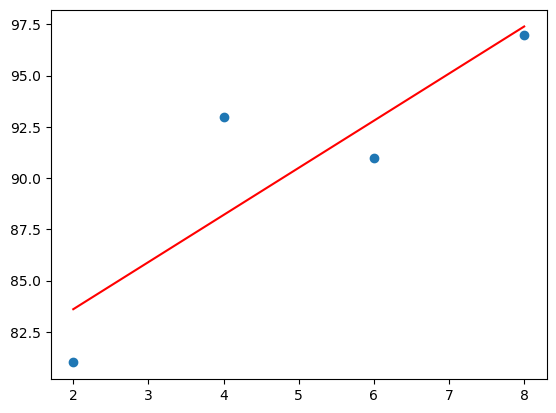

점수 차 :  [-2.59999984  4.80000008 -1.8        -0.40000008]


In [77]:
# 경사 하강법

# 공부시간 x와 성적 y의 넘파이 배열
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 확인하기
plt.scatter(x,y)
plt.show()

# 기울기와 절편 초기화
a=0
b=0

#학습률
lr = 0.03

#몇 번 반복될지 설정.(데이터 전체가 몇번 학습 하는지)
epochs = 2001

#x의 총 개수
n = len(x)

#경사 하강법 시작
for i in range(epochs):
    y_pred = a*x + b      #예측값을 구하는 식
    error = y - y_pred    #실제값과 예상값을 비교한 오차

    a_diff =(2/n) *sum(-x*(error)) # 오차함수를 a로 편미분
    b_diff =(2/n) *sum(-(error))   # 오차함수를 b로 편미분

    a = a - lr *a_diff # 학습률을 곱해서 기존의 a 값 업데이트
    b = b - lr *b_diff # 학습률을 곱해서 기존의 b 값 업데이트

    if i %100 ==0: #100번마다 현재의 a,b 값을 출력한다.
        print(y_pred)
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f"%(i, a, b))

#최종 a 값을 기울기, b값을 y 절편에 대입하여 그래프를 그린다.
y_pred = a*x+b

#그래프를 그린다
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()
# result1= y-y_pred
# print("점수 차 : ", result1 )

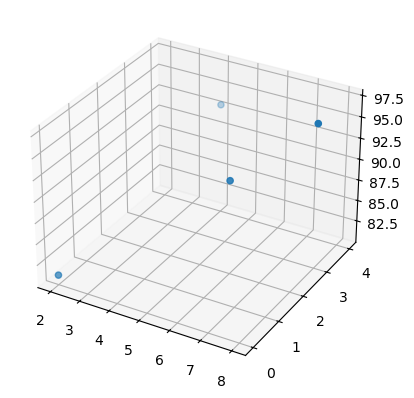

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [79]:
#다중 선형 회귀 

# 공부시간(x1), 과외시간(x2), 성적(y)의 데이터를 NumPy 배열로 정의
x1 = np.array([2, 4, 6, 8])  # 공부 시간
x2 = np.array([0, 4, 2, 3])  # 과외 시간
y = np.array([81, 93, 91, 97])  # 성적

# 데이터의 분포를 3D 그래프로 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 111 : 1행, 1열, 첫번째
# projection='3d' : subplot이 3D 그래프를 그릴 것임을 지정
ax.scatter3D(x1, x2, y)  # 3D 산점도 그리기
plt.show()

# 기울기(a1, a2)와 절편(b)의 초기값 설정
a1 = 0  # 공부시간에 대한 기울기
a2 = 0  # 과외시간에 대한 기울기
b = 0   # 절편

# 학습률(Learning Rate) 설정
lr = 0.01

# 학습 반복 횟수 (전체 데이터를 몇 번 학습할지)
epochs = 2001

#x의 총 개수
n = len(x1)

#경사 하강법 시작
for i in range(epochs):
    y_pred = a1*x1 + a2*x2 + b      #예측값을 구하는 식
    error = y - y_pred    #실제값과 예상값을 비교한 오차

    a1_diff =(2/n) *sum(-x1*(error)) # 오차함수를 a1로 편미분
    a2_diff =(2/n) *sum(-x2*(error)) # 오차함수를 a2로 편미분
    b_diff =(2/n) *sum(-(error))   # 오차함수를 b로 편미분

    a1 = a1 - lr *a1_diff # 학습률을 곱해서 기존의 a1 값 업데이트
    a2 = a2 - lr *a2_diff # 학습률을 곱해서 기존의 a2 값 업데이트
    b = b - lr *b_diff # 학습률을 곱해서 기존의 b 값 업데이트

    if i %100 ==0: #100번마다 현재의 a1, a2, b 값을 출력한다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f"%(i, a1, a2, b))

#실제 점수와 예측된 점수 출력
print("실제 점수 : ", y)
print("예측 점수 : ", y_pred)
# result2 = y-y_pred
# print("점수 차 : ", result2 )

In [81]:
#result1- result2

array([-2.83612339,  4.7715393 , -1.37479125, -0.64412518])

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)


Epoch 1/500


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 8790.8262
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2121.3489
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1136.4396
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 986.4858
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 959.2004
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 949.9661
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 943.4168
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 937.2955
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 931.2704
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 925.2928
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 919.3550
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 913.4559
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 907.5950
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 901.7722
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 895.98

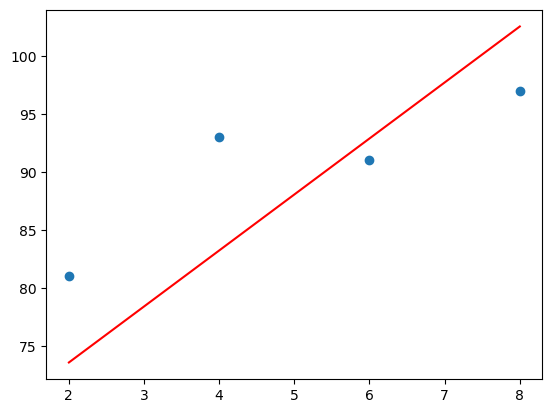

ValueError: Unrecognized data type: x=[7] (of type <class 'list'>)

In [5]:
# 케라스 API 중에서 필요한 함수들을 다음과 같이 불러옴
from tensorflow.keras.models import Sequential
#모델 초기화, 껍데기 만들기

from tensorflow.keras.layers import Dense
#모델을 층으로 채우기

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

model = Sequential()
model.add(Dense(1, input_dim=1, activation = 'linear'))

model.compile(optimizer = 'sgd', loss = 'mse')

model.fit(x, y, epochs = 500)

plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 6821.5864
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1839.8389
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1102.7648
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 989.1620
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 967.1664
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 958.6601
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 952.1689
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 946.0078
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 939.9289
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 933.8954
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 927.9020
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 921.9476
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 916.0317
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 910.1541
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - 

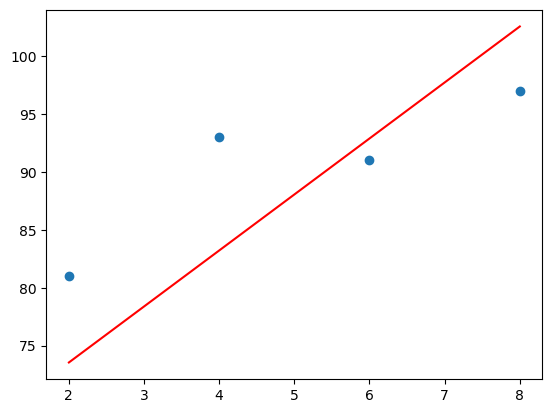

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
7시간을 공부할 경우의 예상 점수는 97.72점입니다.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 정의
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 모델 초기화
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# 모델 컴파일
model.compile(optimizer='sgd', loss='mse')

# 모델 학습
model.fit(x, y, epochs=500)

# 결과 시각화
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 예측
hour = 7
prediction = model.predict(np.array([[float(hour)]]))  # float으로 변환하여 2D 배열로 만듭니다.
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction[0][0]))


In [13]:
# 예측
hour = 7
prediction = model.predict(np.array([[float(hour)]]))  # float으로 변환하여 2D 배열로 만듭니다.
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7시간을 공부할 경우의 예상 점수는 97.72점입니다.
